Atividade Individual

Correlação e Regressão Simples/Multivariada

In [ ]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np
# Visualização
import seaborn as sns
import matplotlib.pyplot as plt


#**Exploração inicial da base - Base 1**

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.


In [ ]:
url_1 = "https://raw.githubusercontent.com/CristianaMoura/Desafios_Individuais_DadosWomakersCode/refs/heads/main/6_exer_regressao/house_data.csv.xls"

df_house = pd.read_csv(url_1)

df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###   Verificação de Valores Ausentes e Duplicatas - Base 1

Nesta etapa, vamos verificar dimensões do dataframe, se existem valores ausentes ou registros duplicados no dataset.





In [ ]:
# Verificar dimensões do dataframe
print("Formato da base:", df_house.shape)

# Verificar valores ausentes
print("🔍 Valores ausentes por coluna:")
print(df_house.isnull().sum())

# Verificar registros duplicados
duplicatas = df_house.duplicated().sum()
print(f"\n📦 Registros duplicados encontrados: {duplicatas}")

Formato da base: (9999, 21)
🔍 Valores ausentes por coluna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

📦 Registros duplicados encontrados: 0


In [ ]:
# Exemplo: remover colunas desnecessárias (ajuste conforme análise)
df_house_clean = df_house.drop(columns=['id', 'date'], errors='ignore')

# Verificar novamente os tipos e nulos
df_house_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9999 non-null   float64
 1   bedrooms       9999 non-null   int64  
 2   bathrooms      9999 non-null   float64
 3   sqft_living    9999 non-null   int64  
 4   sqft_lot       9999 non-null   int64  
 5   floors         9999 non-null   float64
 6   waterfront     9999 non-null   object 
 7   view           9999 non-null   int64  
 8   condition      9999 non-null   int64  
 9   grade          9999 non-null   int64  
 10  sqft_above     9999 non-null   int64  
 11  sqft_basement  9999 non-null   int64  
 12  yr_built       9999 non-null   int64  
 13  yr_renovated   9999 non-null   int64  
 14  zipcode        9999 non-null   int64  
 15  lat            9999 non-null   float64
 16  long           9999 non-null   float64
 17  sqft_living15  9999 non-null   int64  
 18  sqft_lot

In [ ]:
df_kc_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:

#  Questão 1

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


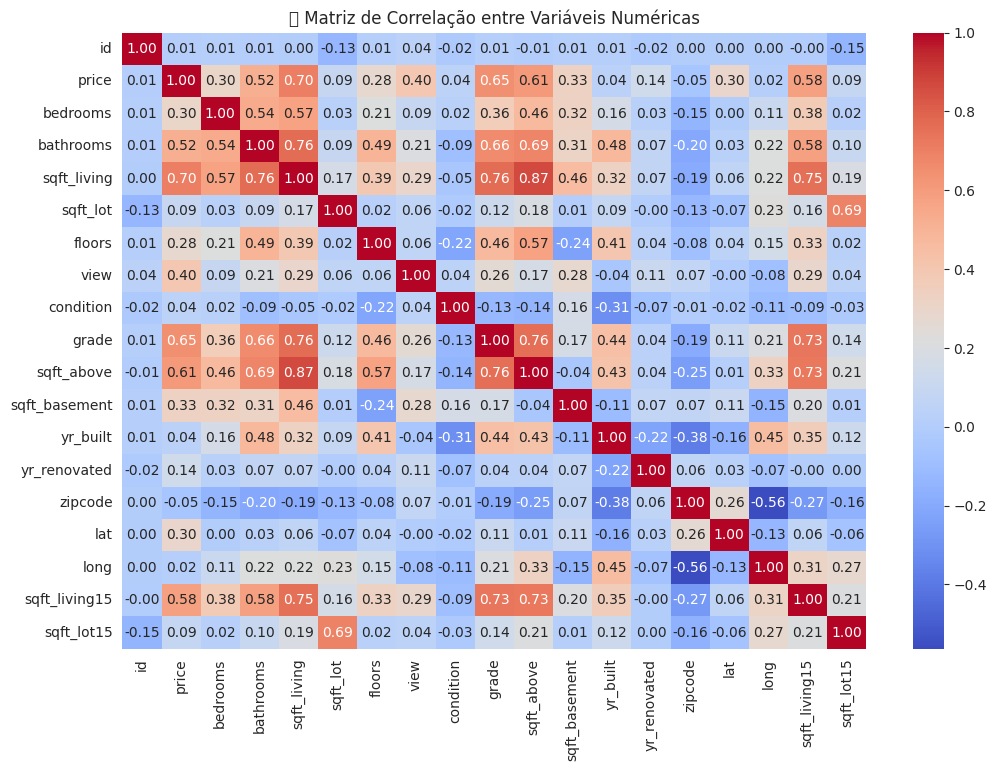

In [ ]:
# Selecionar colunas numéricas
numericas = df_house.select_dtypes(include=['int64', 'float64'])

# Gerar matriz de correlação
matriz_corr = numericas.corr()

# Exibir a matriz como um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("🔍 Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
# Correlação geral entre preço e número de quartos
correlacao_geral = df_house['price'].corr(df_house['bedrooms'])
print(f"📌 Correlação entre preço e número de quartos (geral): {correlacao_geral:.2f}")

📌 Correlação entre preço e número de quartos (geral): 0.30


In [ ]:
# Filtrar casas com área maior que 2000 sqft
casas_maiores = df_house[df_house['sqft_living'] > 2000]

# Correlação entre preço e quartos nesse subconjunto
correlacao_filtrada = casas_maiores['price'].corr(casas_maiores['bedrooms'])
print(f"📌 Correlação entre preço e quartos (casas com +2000 sqft): {correlacao_filtrada:.2f}")

📌 Correlação entre preço e quartos (casas com +2000 sqft): 0.12


# Questão 2

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [ ]:
# Filtrar DataFrame para casas com bathrooms >= 2
casas_banheiros = df_house[df_house['bathrooms'] >= 2]

In [ ]:
# Calcular correlação
correlacao_area_preco = casas_banheiros['price'].corr(casas_banheiros['sqft_living'])
print(f"📌 Correlação entre preço e área (sqft_living) com ≥ 2 banheiros: {correlacao_area_preco:.2f}")

📌 Correlação entre preço e área (sqft_living) com ≥ 2 banheiros: 0.71


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


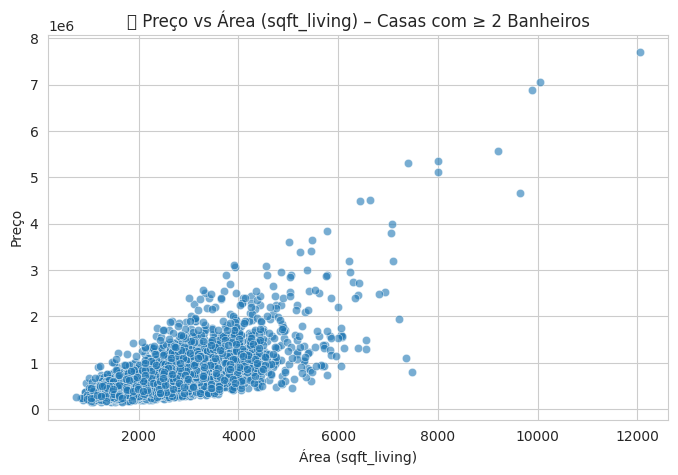

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=casas_banheiros, x='sqft_living', y='price', alpha=0.6)
plt.title("💰 Preço vs Área (sqft_living) – Casas com ≥ 2 Banheiros")
plt.xlabel("Área (sqft_living)")
plt.ylabel("Preço")
plt.show()

#  Questão 3

3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [ ]:
# Agrupar por bathrooms e calcular a correlação entre sqft_living e price
correlacoes = []

# Considerar valores inteiros de bathrooms entre 1 e 5 (exemplos mais comuns)
for b in sorted(df_house['bathrooms'].unique()):
    grupo = df_house[df_house['bathrooms'] == b]
    if len(grupo) >= 30:  # só considerar grupos razoáveis
        corr = grupo['sqft_living'].corr(grupo['price'])
        correlacoes.append({'banheiros': b, 'correlacao': corr, 'n': len(grupo)})

# Converter para DataFrame
df_corr_bath = pd.DataFrame(correlacoes).sort_values(by='banheiros')
df_corr_bath

,banheiros,correlacao,n
0,0.75,0.357178,37
1,1.00,0.359529,1945
2,1.50,0.423405,713
3,1.75,0.449225,1502
4,2.00,0.446945,955
5,2.25,0.598274,938
6,2.50,0.559945,2290
7,2.75,0.522397,534
8,3.00,0.569033,332
9,3.25,0.544659,228


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


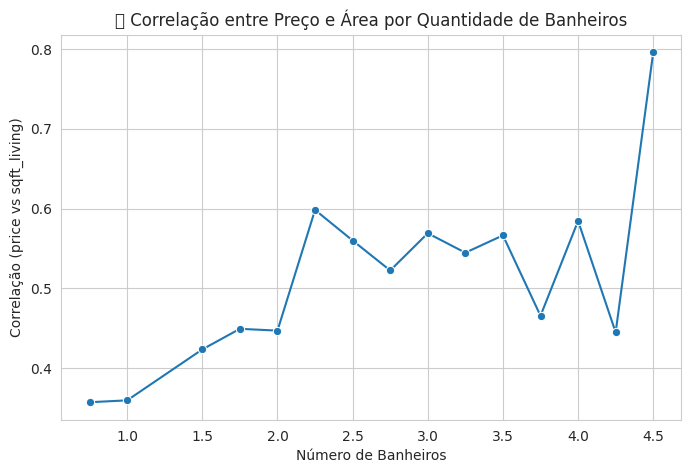

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_corr_bath, x='banheiros', y='correlacao', marker='o')
plt.title("📈 Correlação entre Preço e Área por Quantidade de Banheiros")
plt.xlabel("Número de Banheiros")
plt.ylabel("Correlação (price vs sqft_living)")
plt.grid(True)
plt.show()

#  Questão 4

4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [ ]:
# Filtrar casas grandes
casas_grandes = df_house_clean[df_house['sqft_living'] > 3000]

# Agrupar por condição e calcular média de preço
media_preco_por_condicao = casas_grandes.groupby('condition')['price'].mean().reset_index()

# Visualizar a tabela
media_preco_por_condicao

,condition,price
0,2,7.150000e+05
1,3,1.016932e+06
2,4,1.087104e+06
3,5,1.292893e+06


<ipython-input-36-d7a130105b35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_preco_por_condicao, x='condition', y='price', palette='Blues_d')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


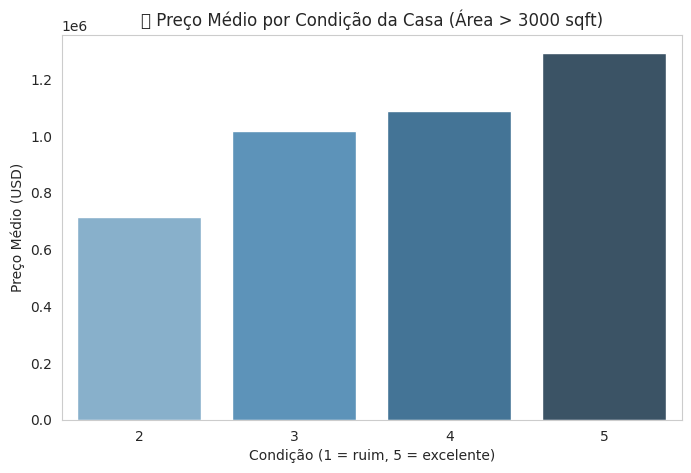

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=media_preco_por_condicao, x='condition', y='price', palette='Blues_d')
plt.title("💡 Preço Médio por Condição da Casa (Área > 3000 sqft)")
plt.xlabel("Condição (1 = ruim, 5 = excelente)")
plt.ylabel("Preço Médio (USD)")
plt.grid(axis='y')
plt.show()

#  Questão 5

5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?


In [ ]:
# Filtrar casas com 3 ou mais quartos
casas_3q = df_house[df_house['bedrooms'] >= 3]

# Calcular correlações
cor_lat = casas_3q['lat'].corr(casas_3q['price'])
cor_long = casas_3q['long'].corr(casas_3q['price'])

print(f"📌 Correlação entre latitude e preço: {cor_lat:.2f}")
print(f"📌 Correlação entre longitude e preço: {cor_long:.2f}")

📌 Correlação entre latitude e preço: 0.31
📌 Correlação entre longitude e preço: -0.01


#  Questão 6

6. preço price para casas com pelo menos três quartos bedrooms?
Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.

In [ ]:
# Verificar os valores únicos de 'waterfront'
print(df_house['waterfront'].value_counts(dropna=False))

waterfront
n    9920
y      79
Name: count, dtype: int64


In [ ]:
from scipy.stats import f_oneway

# Separar os grupos
grupo_com_vista = df_house[df_house['waterfront'] == 1]['price']
grupo_sem_vista = df_house[df_house['waterfront'] == 0]['price']

# Teste ANOVA
f_stat, p_valor = f_oneway(grupo_com_vista, grupo_sem_vista)

print(f"📈 Estatística F: {f_stat:.2f}")
print(f"📊 Valor-p: {p_valor:.5f}")

📈 Estatística F: nan
📊 Valor-p: nan


<ipython-input-44-eb6addc9a2da>:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_valor = f_oneway(grupo_com_vista, grupo_sem_vista)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


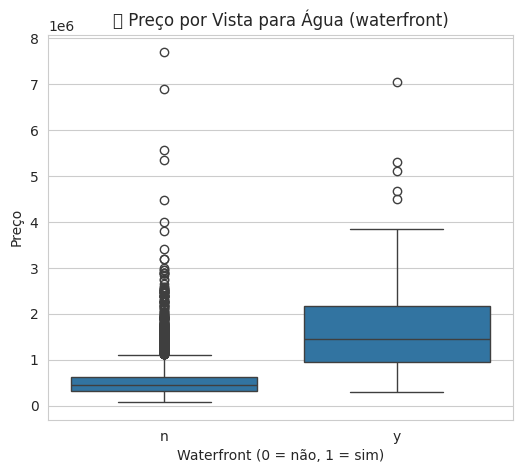

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_house, x='waterfront', y='price')
plt.title("💧 Preço por Vista para Água (waterfront)")
plt.xlabel("Waterfront (0 = não, 1 = sim)")
plt.ylabel("Preço")
plt.show()

#**Exploração inicial da base - Base 2**

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.


In [ ]:

url_2 = "https://raw.githubusercontent.com/CristianaMoura/Desafios_Individuais_DadosWomakersCode/refs/heads/main/6_exer_regressao/car_price.csv.xls"

df_car = pd.read_csv(url_2)

df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


###   Verificação de Valores Ausentes, Duplicatas e Padronização de dados - Base 2

Nesta etapa, vamos verificar dimensões do dataframe, se existem valores ausentes ou registros duplicados no dataset.

As colunas `Engine` e `Max Power` contêm números seguidos de unidades como 'CC' e 'bhp'. Vamos extrair os valores numéricos e converter para `float`.

In [ ]:
# Verificar dimensões do dataframe
print("Formato da base:", df_car.shape)

# Verificar valores ausentes
print("🔍 Valores ausentes por coluna:")
print(df_car.isnull().sum())

# Verificar registros duplicados
duplicatas = df_car.duplicated().sum()
print(f"\n📦 Registros duplicados encontrados: {duplicatas}")

Formato da base: (1874, 20)
🔍 Valores ausentes por coluna:
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

📦 Registros duplicados encontrados: 0


In [ ]:
# Corrigir colunas numéricas
df_car['Seating Capacity'] = pd.to_numeric(df_car['Seating Capacity'], errors='coerce')
df_car['Fuel Tank Capacity'] = pd.to_numeric(df_car['Fuel Tank Capacity'], errors='coerce')

# Converter colunas de texto em categorias
categoricas = ['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type']
df_car[categoricas] = df_car[categoricas].astype('category')

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Make                1874 non-null   category
 1   Model               1874 non-null   object  
 2   Price               1874 non-null   int64   
 3   Year                1874 non-null   int64   
 4   Kilometer           1874 non-null   int64   
 5   Fuel Type           1874 non-null   category
 6   Transmission        1874 non-null   category
 7   Location            1874 non-null   category
 8   Color               1874 non-null   category
 9   Owner               1874 non-null   category
 10  Seller Type         1874 non-null   category
 11  Engine              1874 non-null   object  
 12  Max Power           1874 non-null   object  
 13  Max Torque          1874 non-null   object  
 14  Drivetrain          1874 non-null   object  
 15  Length              1874 non-null   fl

Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:


7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.

In [ ]:
# Selecionar variáveis numéricas
numericas_car= df_car.select_dtypes(include=['int64', 'float64'])

# Verificar colunas disponíveis
numericas_car.columns

Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


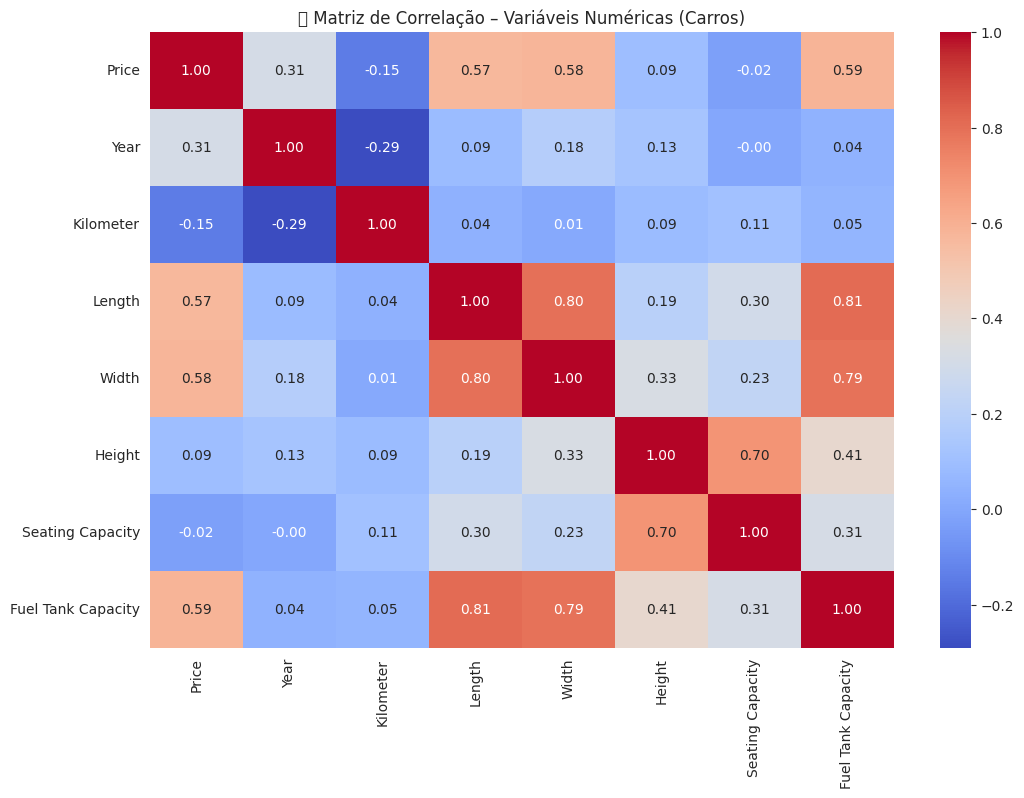

In [ ]:
# Calcular a matriz de correlação
corr_car = numericas_car.corr()

# Exibir como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_car, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Matriz de Correlação – Variáveis Numéricas (Carros)")
plt.show()

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.

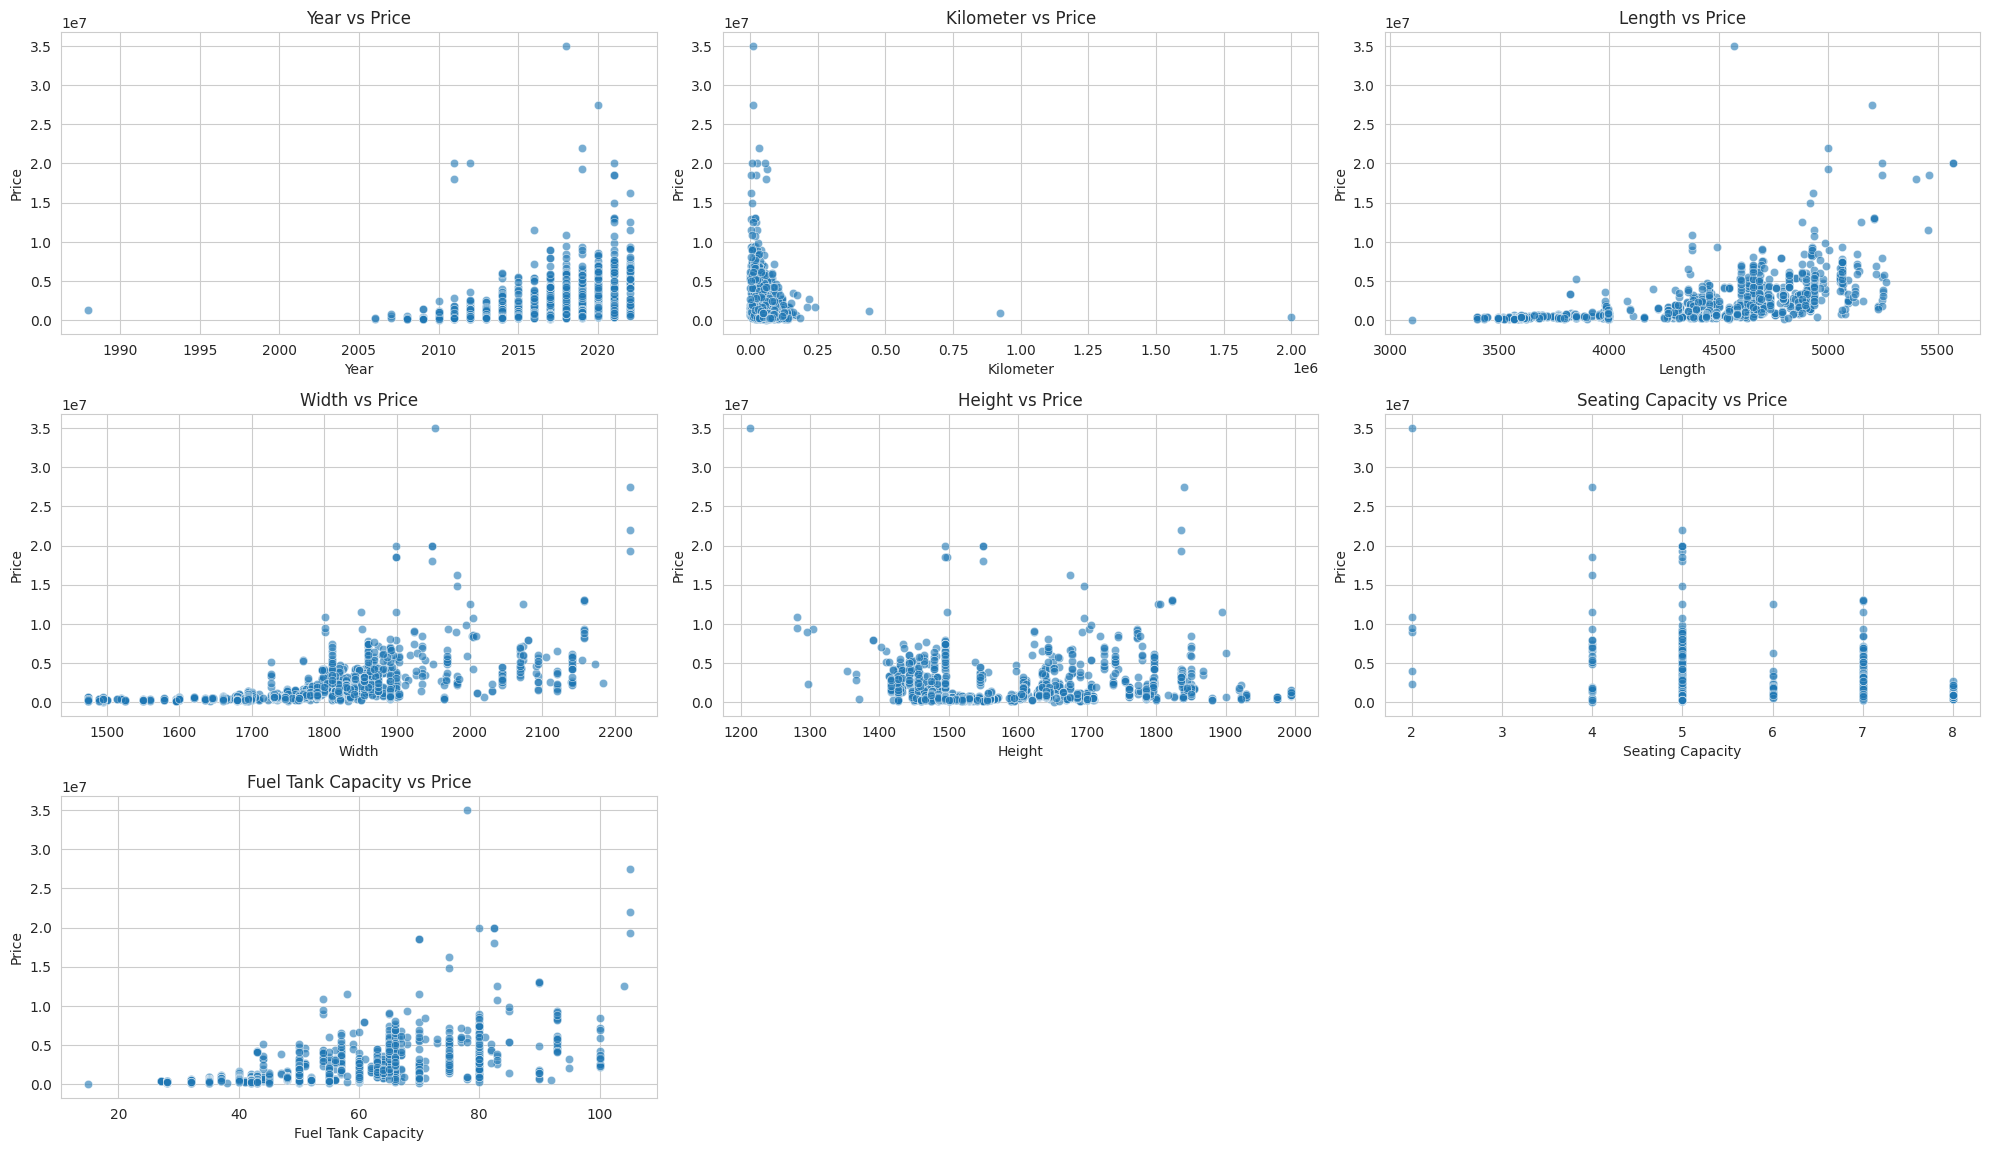

In [ ]:
# Selecionar colunas numéricas, excluindo o próprio preço
colunas_numericas = df_car.select_dtypes(include=['int64', 'float64']).drop(columns=['Price']).columns

# Criar gráficos de dispersão para cada variável numérica em relação ao Preço
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(4, 3, i + 1)  # ajustar layout: 4 linhas, 3 colunas
    sns.scatterplot(data=df_car, x=coluna, y='Price', alpha=0.6)
    plt.title(f"{coluna} vs Price")
    plt.xlabel(coluna)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.49e-10
Time:                        20:48:05   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.041e+06   7.48e+04     27.302      0.0

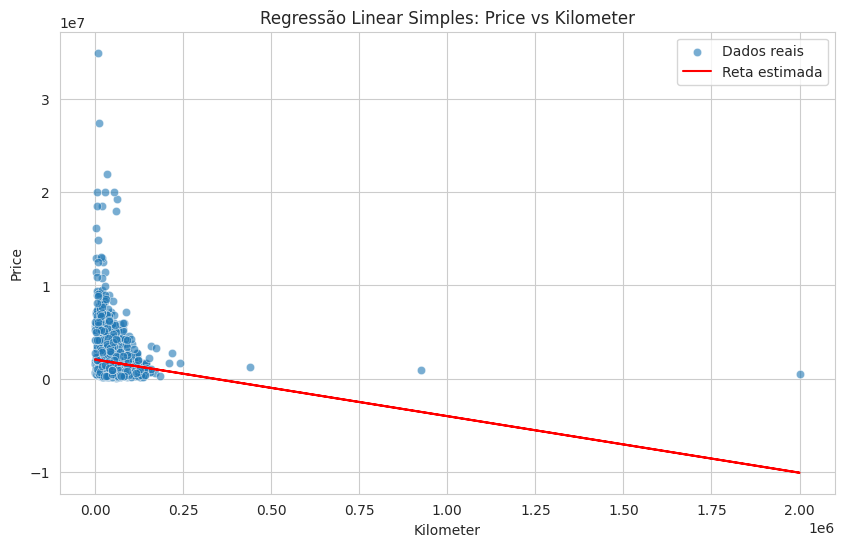

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# selecionar as variáveis: variável dependente (y) e independente (X)
X = df_car["Kilometer"]
y = df_car["Price"]

# Garantir que são numéricos e remover valores ausentes
X = pd.to_numeric(X, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
valid = ~(X.isna() | y.isna())
X = X[valid]
y = y[valid]

# Adicionar constante para o modelo
X_const = sm.add_constant(X)

# Criar e ajustar o modelo de Regressão Linear Simples
modelo = sm.OLS(y, X_const).fit()

# Exibir a Tabela de Regressão
print(modelo.summary())

# Plot da reta estimada
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, label='Dados reais', alpha=0.6)
plt.plot(X, modelo.predict(X_const), color='red', label='Reta estimada')
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.title("Regressão Linear Simples: Price vs Kilometer")
plt.legend()
plt.grid(True)
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

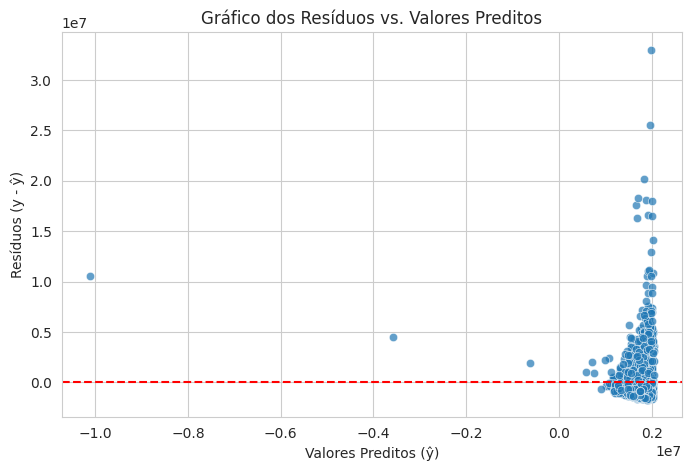

In [ ]:
# Previsões do modelo
y_pred = modelo.predict(X_const)

# Cálculo dos resíduos
residuos = y - y_pred

# Plot do gráfico de resíduos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico dos Resíduos vs. Valores Preditos")
plt.xlabel("Valores Preditos (ŷ)")
plt.ylabel("Resíduos (y - ŷ)")
plt.grid(True)
plt.show()


11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

In [ ]:
# Selecionar apenas colunas numéricas (ajuste conforme necessário)
colunas_numericas = df_car.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remover a variável alvo da lista de preditores
colunas_numericas.remove('Price')

# Definir X e y
X_multi = df_car[colunas_numericas].dropna()
y_multi = df_car.loc[X_multi.index, 'Price']  # Garante alinhamento

# Adicionar constante (intercepto)
X_multi_const = sm.add_constant(X_multi)

# Criar e ajustar o modelo
modelo_multi = sm.OLS(y_multi, X_multi_const).fit()

# Exibir a tabela de regressão
print(modelo_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.49e-278
Time:                        20:49:31   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

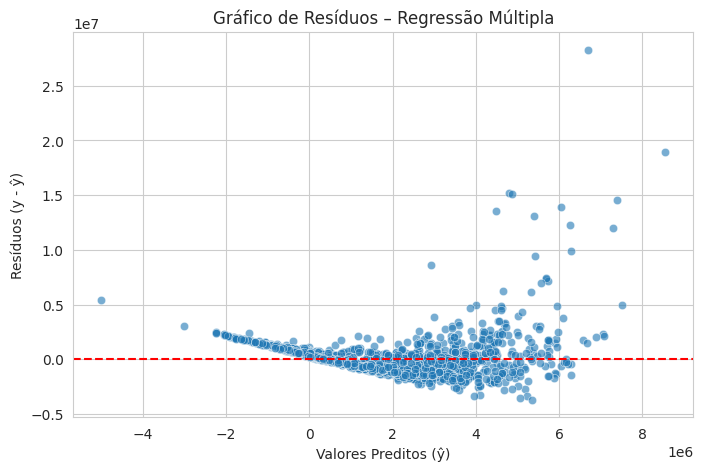

In [ ]:
# Calcular resíduos
residuos_multi = modelo_multi.resid
y_pred_multi = modelo_multi.predict(X_multi_const)

# Plot dos resíduos
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_multi, y=residuos_multi, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Resíduos – Regressão Múltipla")
plt.xlabel("Valores Preditos (ŷ)")
plt.ylabel("Resíduos (y - ŷ)")
plt.grid(True)
plt.show()